<a href="https://colab.research.google.com/github/MiriamToledo/AA_PRACTICA1_GRUPO_5/blob/main/AA_PRACTICA1_GRUPO_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 1: Diseño, entrenamiento y test de un sisteda de redes de neuronas artificiales
### Grupo 5
### Miriam Toledo
### Inés Sánchez
A continuación, vamos a crear un modelo de red de neuronas artificiales que sea capaz de reconocer y clasificar imágenes de ropa en sus diferentes tipologías. Para ello vamos emplear Keras, específicamente el conjunto de datos Fashion-MNIST.
## 1- IMPORTAMOS TODAS LAS LIBRERÍAS NECESARIAS 
También nos aseguramos de ejecutar la versión 2.0.0 de TensorFlow.


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical
import numpy as np

2.6.0
GPU Available: []
2.6.0


## 2- CARGAMOS EL CONJUNTO DE DATOS Y ANALIZAMOS QUE TENGAN LA FORMA ESPERADA

In [ ]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_images.shape)
print(len(train_labels))
# Vemos la matriz de la imagen número 1500
print(train_images[1500])
num = train_labels[1500]
print(num)

(60000, 28, 28)
60000
[[  0   0   0   0   0   0   0   0   0  59 144 141 146 149 163 150  58  70
   92   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  87 139 165 176 176 177 204 133 114
  129   8   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 136 194 161 158 195 130 182 158 198
  184  87   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 178 183 160 148 164 110 165 154 157
  163  65   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 185 137 139 164 162 159 176 162 147
  150  62   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  17 198 157 168 165 202 218 171 166 156
  164  71   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  59 181 116 151 155 214 193 202 159 123
  147  58   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  72 158 105 136 161 138 181 230 146 119
  134  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  85 144 

La clasificación corresponde con:


0.   Camiseta /Top
1. Pantalón
2. Jersey
3. Vestido
4. Abrigo
5. Sandalia
6. Camisa
7. Zapatillas
8. Bolsa
9. Botas tobilleras

Cada imagen tiene una única etiqueta. Cremaos class_names para poder usarlos a la hora de visualizar las imágnes. Y comprobamos que efectivamente la etiqueta 1 corresponde con un pantalón. 




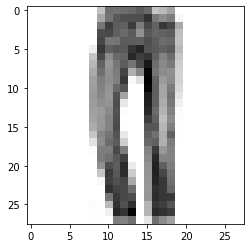

In [ ]:
class_names = ['Camiseta', 'Pantalón', 'Jersey', 'Vestido', 'Abrigo', 'Sandalias', 'Camisa', 'Zapatillas', 'Bolsa', 'Botas tobilleras']
digit = train_images[1500]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Comprobamos la forma de los datos de prueba y tienen la misma forma que los datos de entrenamiento.

In [ ]:
print(test_images.shape)
print(len(test_labels))


(10000, 28, 28)
10000


## 3- CONSTRUCCIÓN DE LA RNA
### 3.1 - Caso 1
Esta red neuronal tiene 10 neuronas en la capa 1, su función de activación es relu y utiliza el optimizador sgd.

In [ ]:
red1 = models.Sequential()
red1.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
red1.add(layers.Dense(10, activation = 'softmax'))
red1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


La función red1.summary() nos indica:


*   7850 = 784*10 +10,  784 de multiplicar 28*28 y 10 ya que tenemos 10 neuronas,  le sumamos 10 porque es el sesgo.
*   110 = 10*10 + 10, porque tenemos 10 neuronas en la capa 1 y otras 10 en la segunda capa, le sumamos 10 del sesgo.
*   7960 = 7850 + 110 , puesto que es el número total de parámetros


A continuación llevamos a cabo el paso de compilación cargando el optimizador, la función de pérdida y las métricas.




In [ ]:
red1.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

Después, preparamos los datos de las imágenes transdormandolos en tensores y normanizándolos. 


In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
print(train_images, len(train_images), train_images.shape, train_images[3000])
train_images = train_images.astype('float32') / 255
print(train_images, len(train_images), train_images.shape, train_images[3000])
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 60000 (60000, 784) [  0   0   0   0   0   0   0   0   1   1   0   0 120 131  91 147  30   0
   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   1   3
   0   0   0   0 251 199 172 195 152   0   0   0   0   3   1   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  43 124 193 166 239 255 216
 172 228 126  61   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  96 167 155 159 171 178 211 215 210 196 189 158 164 159 108   0   0
   0   0   0   0   0   0   0   0   0   0  83 157 131 117 120 148 148 145
 178 159 174 160 123 132 142 172  38   0   0   0   0   0   0   0   0   0
   0   0 159 128 118 120 122 112  93 124 161 109 128 128 129 146 138 167
 122   0   0   0   0   0   0   0   0   0   0   0 171 135 120 114 118 119
 107 125 123 117 124 124 119 145 147 166 148   0   0   0   0   0   0   0
   0   0   0   4 171 138 126 120 117 118 102 122 145 111 1

Ahora preparamos las etiquetas. Para eso utilizamos _Flatten_ que sirve para aplanar la entrada y que así coincidan las dimensiones de la red, para así poder entrenarla. Además, de esta forma podremos usar la función de pérdida sparse_categorical_crossentropy, que explicaremos más adelante.



In [ ]:
red1.add(layers.Flatten(input_shape=(28,28)))

Por último entrenamos la red a través de fit, realizando 5 épocas de entrenamiento y en mini lotes de 128 imagenes en cada uno.

In [ ]:
red1.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 1.5758 - accuracy: 0.5231
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.9089 - accuracy: 0.6982
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.7290 - accuracy: 0.7670
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6547 - accuracy: 0.7857
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6113 - accuracy: 0.7961


Después verificamos el modelo ya entrenado con el conjunto de pruebas.

In [ ]:
test_loss, test_acc = red1.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 995us/step - loss: 0.6125 - accuracy: 0.7908


Vemos que nuestra red neuronal tiene una precisión de 0.78 y una pérdida de 0.61.


In [ ]:
print('test_acc:', test_acc)

test_acc: 0.7907999753952026


### 3.2 - Caso 2
Esta red neuronal tiene 10 neuronas en la capa 1, su función de activación es relu y utiliza el optimizador rmsprop.

In [ ]:
red2 = models.Sequential()
red2.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
red2.add(layers.Dense(10, activation = 'softmax'))
red2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


La función red2.summary() nos indica:


*   7850 = 784*10 +10,  784 de multiplicar 28*28 y 10 ya que tenemos 10 neuronas,  le sumamos 10 porque es el sesgo.
*   110 = 10*10 + 10, porque tenemos 10 neuronas en la capa 1 y otras 10 en la segunda capa, le sumamos 10 del sesgo.
*   7960 = 7850 + 110 , puesto que es el número total de parámetros


A continuación llevamos a cabo el paso de compilación cargando el optimizador, la función de pérdida y las métricas.




In [ ]:
red2.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

Por último entrenamos la red a través de fit.

In [ ]:
red2.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8416 - accuracy: 0.7221
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5319 - accuracy: 0.8192
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4772 - accuracy: 0.8359
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4519 - accuracy: 0.8433
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4348 - accuracy: 0.8495


Después verificamos el modelo ya entrenado con el conjunto de pruebas.

In [ ]:
test_loss, test_acc = red2.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 962us/step - loss: 0.4913 - accuracy: 0.8275


Vemos que nuestra red neuronal tiene una precisión de 0.83 y una pérdida de 0.46.


In [ ]:
print('test_acc:', test_acc)

test_acc: 0.8274999856948853


### 3.3 - Caso 3
Esta red neuronal tiene 10 neuronas en la capa 1, su función de activación es sigmoid y utiliza el optimizador sgd.

In [ ]:
red3 = models.Sequential()
red3.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
red3.add(layers.Dense(10, activation = 'softmax'))
red3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


La función red3.summary() nos indica:


*   7850 = 784*10 +10,  784 de multiplicar 28*28 y 10 ya que tenemos 10 neuronas,  le sumamos 10 porque es el sesgo.
*   110 = 10*10 + 10, porque tenemos 10 neuronas en la capa 1 y otras 10 en la segunda capa, le sumamos 10 del sesgo.
*   7960 = 7850 + 110 , puesto que es el número total de parámetros


A continuación llevamos a cabo el paso de compilación cargando el optimizador, la función de pérdida y las métricas.




In [ ]:
red3.compile(optimizer='sgd',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

Por último entrenamos la red a través de fit.

In [ ]:
red3.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 2.1476 - accuracy: 0.2746
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 1.8231 - accuracy: 0.5834
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 1.6197 - accuracy: 0.6387
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 1.4702 - accuracy: 0.6502
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 1.3514 - accuracy: 0.6635


Después verificamos el modelo ya entrenado con el conjunto de pruebas.


In [ ]:
test_loss, test_acc = red3.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 1.3046 - accuracy: 0.6613


Vemos que nuestra red neuronal tiene una precisión de 0.61 y una pérdida de 1.32.


In [ ]:
print('test_acc:', test_acc)

test_acc: 0.661300003528595


### 3.4 - Caso 4
Esta red neuronal tiene 10 neuronas en la capa 1, su función de activación es sigmoid y utiliza el optimizador rmsprop.

In [ ]:
red4 = models.Sequential()
red4.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
red4.add(layers.Dense(10, activation = 'softmax'))
red4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


La función red4.summary() nos indica:


*   7850 = 784*10 +10,  784 de multiplicar 28*28 y 10 ya que tenemos 10 neuronas,  le sumamos 10 porque es el sesgo.
*   110 = 10*10 + 10, porque tenemos 10 neuronas en la capa 1 y otras 10 en la segunda capa, le sumamos 10 del sesgo.
*   7960 = 7850 + 110 , puesto que es el número total de parámetros


A continuación llevamos a cabo el paso de compilación cargando el optimizador, la función de pérdida y las métricas.




In [ ]:
red4.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

Por último entrenamos la red a través de fit.

In [ ]:
red4.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 1.4231 - accuracy: 0.6232
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8484 - accuracy: 0.7710
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6347 - accuracy: 0.8028
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5462 - accuracy: 0.8208
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5018 - accuracy: 0.8302


Después verificamos el modelo ya entrenado con el conjunto de pruebas.

In [ ]:
test_loss, test_acc = red4.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 964us/step - loss: 0.5111 - accuracy: 0.8244


Vemos que nuestra red neuronal tiene una precisión de 0.82 y una pérdida 0.51.


In [ ]:
print('test_acc:', test_acc)

test_acc: 0.824400007724762


### 3.5 - Caso 5
Esta red neuronal tiene 512 neuronas en la capa 1, su función de activación es relu y utiliza el optimizador sgd.

In [ ]:
red5 = models.Sequential()
red5.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
red5.add(layers.Dense(10, activation = 'softmax'))
red5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


La función red5.summary() nos indica:


*   401920 = 784*512 +512,  784 de multiplicar 28*28 y 512 ya que tenemos 512 neuronas,  le sumamos 512 porque es el sesgo.
*   5130 = 512*10 + 10, porque tenemos 512 neuronas en la capa 1 y 10 en la segunda capa, le sumamos 10 del sesgo.
*   407050 = 401920 + 5130 , puesto que es el número total de parámetros


A continuación llevamos a cabo el paso de compilación cargando el optimizador, la función de pérdida y las métricas.




In [ ]:
red5.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

Por último entrenamos la red a través de fit.

In [ ]:
red5.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 1.0039 - accuracy: 0.6988
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.6508 - accuracy: 0.7934
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.5756 - accuracy: 0.8133
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.5359 - accuracy: 0.8231
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.5103 - accuracy: 0.8303


Después verificamos el modelo ya entrenado con el conjunto de pruebas.

In [ ]:
test_loss, test_acc = red5.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5269 - accuracy: 0.8196


Vemos que nuestra red neuronal tiene una precisión de 0.82 y una pérdida de 0.52.


In [ ]:
print('test_acc:', test_acc)

test_acc: 0.819599986076355


### 3.6 - Caso 6
Esta red neuronal tiene 512 neuronas en la capa 1, su función de activación es relu y utiliza el optimizador rmsprop.

In [ ]:
red6 = models.Sequential()
red6.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
red6.add(layers.Dense(10, activation = 'softmax'))
red6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


La función red6.summary() nos indica:


*   401920 = 784*512 +512,  784 de multiplicar 28*28 y 512 ya que tenemos 512 neuronas,  le sumamos 512 porque es el sesgo.
*   5130 = 512*10 + 10, porque tenemos 512 neuronas en la capa 1 y 10 en la segunda capa, le sumamos 10 del sesgo.
*   407050 = 401920 + 5130 , puesto que es el número total de parámetros


A continuación llevamos a cabo el paso de compilación cargando el optimizador, la función de pérdida y las métricas.




In [ ]:
red6.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

Por último entrenamos la red a través de fit.

In [ ]:
red6.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.5564 - accuracy: 0.8017
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3796 - accuracy: 0.8611
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3355 - accuracy: 0.8767
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3096 - accuracy: 0.8853
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2921 - accuracy: 0.8935


Después verificamos el modelo ya entrenado con el conjunto de pruebas.

In [ ]:
test_loss, test_acc = red6.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3515 - accuracy: 0.8752


Vemos que nuestra red neuronal tiene una precisión de 0.87 y una pérdida de 0.34.


In [ ]:
print('test_acc:', test_acc)

test_acc: 0.8751999735832214


### 3.7 - Caso 7
Esta red neuronal tiene 512 neuronas en la capa 1, su función de activación es sigmoid y utiliza el optimizador sgd.

In [ ]:
red7 = models.Sequential()
red7.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
red7.add(layers.Dense(10, activation = 'softmax'))
red7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


La función red7.summary() nos indica:


*   401920 = 784*512 +512,  784 de multiplicar 28*28 y 512 ya que tenemos 512 neuronas,  le sumamos 512 porque es el sesgo.
*   5130 = 512*10 + 10, porque tenemos 512 neuronas en la capa 1 y 10 en la segunda capa, le sumamos 10 del sesgo.
*   407050 = 401920 + 5130 , puesto que es el número total de parámetros


A continuación llevamos a cabo el paso de compilación cargando el optimizador, la función de pérdida y las métricas.




In [ ]:
red7.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

Por último entrenamos la red a través de fit.

In [ ]:
red7.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 1.7017 - accuracy: 0.5850
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 1.1318 - accuracy: 0.7091
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.9274 - accuracy: 0.7294
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.8259 - accuracy: 0.7420
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.7648 - accuracy: 0.7502


Después verificamos el modelo ya entrenado con el conjunto de pruebas.

In [ ]:
test_loss, test_acc = red7.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.7533 - accuracy: 0.7464


Vemos que nuestra red neuronal tiene una precisión de 0.74 y una pérdida 0.75.


In [ ]:
print('test_acc:', test_acc)

test_acc: 0.746399998664856


### 3.8 - Caso 8
Esta red neuronal tiene 512 neuronas en la capa 1, su función de activación es sigmoid y utiliza el optimizador rmsprop.

In [ ]:
red8 = models.Sequential()
red8.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
red8.add(layers.Dense(10, activation = 'softmax'))
red8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


La función red8.summary() nos indica:


*   401920 = 784*512 +512,  784 de multiplicar 28*28 y 512 ya que tenemos 512 neuronas,  le sumamos 512 porque es el sesgo.
*   5130 = 512*10 + 10, porque tenemos 512 neuronas en la capa 1 y 10 en la segunda capa, le sumamos 10 del sesgo.
*   407050 = 401920 + 5130 , puesto que es el número total de parámetros


A continuación llevamos a cabo el paso de compilación cargando el optimizador, la función de pérdida y las métricas.




In [ ]:
red8.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

Por último entrenamos la red a través de fit.

In [ ]:
red8.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.5893 - accuracy: 0.7940
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.4285 - accuracy: 0.8442
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3868 - accuracy: 0.8596
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3606 - accuracy: 0.8683
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3389 - accuracy: 0.8760


Después verificamos el modelo ya entrenado con el conjunto de pruebas.

In [ ]:
test_loss, test_acc = red8.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3841 - accuracy: 0.8578


Vemos que nuestra red neuronal tiene una precisión de 0.85 y una pérdida de 0.38.


In [ ]:
print('test_acc:', test_acc)

test_acc: 0.8578000068664551


Después de crear los ocho modelos distintos, vemos que el modelo con menor pérdida y mejor precisión, por tanto el mejor modelo, es el sexto con 512 neuronas en la primera capa, función de activación _relu_ y optimizador _rmsprop_.  El peor modelo es el tercero (10 neuronas en la primera capa, función de activación sigmoidea y optimizador _sgd_), ya que es el de mayor pérdida y menor precisión.  
También, comprobamos que mayor cantidad de neuronas no significa mayor precisión, ni menor pérdida. Además, los modelos con el optimizador _rmsprop_ funcionan mejor que los otros modelos, ya que tienen menor pérdida y mayor precisión.  
En cuanto a las funciones de activación, tanto _relu_ como _sigmoid_ funcionan correctamente en todas las redes neuronales. Sin embargo, _relu_ es la más adecuada para problemas de clasificación, como este. 

## 4. COMPARACIÓN CASO 2 Y CASO 7

Seguidamente analizamos e interpretamos los resultados del caso 2 y el 7 frente a sus originales multiplicando por 5 las épocas de entrenamiento.  
Si multiplicamos por 5 las épocas de entrenamiento del caso 2 nos queda lo siguiente:

In [ ]:
# Caso 2:
red2.fit(train_images, train_labels, epochs=5*5, batch_size=128)

Epoch 1/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4244 - accuracy: 0.8525
Epoch 2/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4160 - accuracy: 0.8548
Epoch 3/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4088 - accuracy: 0.8572
Epoch 4/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4028 - accuracy: 0.8595
Epoch 5/25
469/469 [==============================] - 1s 2ms/step - loss: 0.3981 - accuracy: 0.8623
Epoch 6/25
469/469 [==============================] - 1s 2ms/step - loss: 0.3936 - accuracy: 0.8643
Epoch 7/25
469/469 [==============================] - 1s 2ms/step - loss: 0.3899 - accuracy: 0.8635
Epoch 8/25
469/469 [==============================] - 1s 2ms/step - loss: 0.3868 - accuracy: 0.8645
Epoch 9/25
469/469 [==============================] - 1s 2ms/step - loss: 0.3846 - accuracy: 0.8664
Epoch 10/25
469/469 [==============================] - 1s 2ms/step - loss: 0.3814 - accuracy: 0.8659

In [ ]:
test_loss, test_acc = red2.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.4184 - accuracy: 0.8521


In [ ]:
print('test_acc:', test_acc)

test_acc: 0.8521000146865845


Como podemos observar, tiene una pérdida de 0.41, mientras que la pérdida del caso 2 cuando _epoch_= 5 era de 0.46. La precisión con 25 épocas es de 0.85 y con 5 es de 0.83.  
Después de 25 épocas, tanto la precisión como la pérdida son muy similares frente al entrenamiento con 5 épocas, con lo cual creemos que no son necesarias tantas épocas, ya que se produciría un sobreentrenamiento, con 5 son suficientes.  

A continuación, analizamos la misma situación en el caso 7.  
Si multiplicamos por 5 las épocas de entrenamiento del caso 7 nos queda lo siguiente:

In [ ]:
#caso 7
red7.fit(train_images, train_labels, epochs=5*5, batch_size=128)

Epoch 1/25
469/469 [==============================] - 3s 6ms/step - loss: 0.7231 - accuracy: 0.7577
Epoch 2/25
469/469 [==============================] - 3s 6ms/step - loss: 0.6921 - accuracy: 0.7642
Epoch 3/25
469/469 [==============================] - 3s 6ms/step - loss: 0.6676 - accuracy: 0.7712
Epoch 4/25
469/469 [==============================] - 3s 6ms/step - loss: 0.6477 - accuracy: 0.7760
Epoch 5/25
469/469 [==============================] - 3s 6ms/step - loss: 0.6308 - accuracy: 0.7815
Epoch 6/25
469/469 [==============================] - 3s 6ms/step - loss: 0.6159 - accuracy: 0.7872
Epoch 7/25
469/469 [==============================] - 3s 6ms/step - loss: 0.6028 - accuracy: 0.7916
Epoch 8/25
469/469 [==============================] - 3s 6ms/step - loss: 0.5916 - accuracy: 0.7953
Epoch 9/25
469/469 [==============================] - 3s 6ms/step - loss: 0.5810 - accuracy: 0.7994
Epoch 10/25
469/469 [==============================] - 3s 6ms/step - loss: 0.5719 - accuracy: 0.8021

In [ ]:
test_loss, test_acc = red7.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5184 - accuracy: 0.8156


In [ ]:
print('test_acc:', test_acc)

test_acc: 0.8155999779701233


Como podemos observar, tiene una pérdida de 0.47, mientras que la pérdida del caso 7 cuando _epoch_= 5 era de 0.75. La precisión con 25 épocas es de 0.83 y con 5 es de 0.75.  
En este caso, la precisión ha aumentado, y la pérdida ha disminuido. Por tanto, no hay sobreentrenamiento. 

## 5. COMPARACIÓN DEL RENDIMIENTO DEL MODELO EN EL CONJUNTO DE DATOS DE ENTRENAMIENTO

Primero, creamos un conjunto de validación separando 10000 datos de entrenamiento para ver la precisión del modelo durante el entrenamiento con datos que nunca había visto. Después compararemos el rendimiento en cada una de las ocho redes.

In [ ]:
x_val = train_images[:10000]
partial_x_train = train_images[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

### Caso 1

In [ ]:
red1.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = red1.fit(partial_x_train,
                   partial_y_train,
                   epochs  = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
98/98 [==============================] - 1s 5ms/step - loss: 0.5898 - accuracy: 0.8016 - val_loss: 0.5908 - val_accuracy: 0.7991
Epoch 2/20
98/98 [==============================] - 0s 4ms/step - loss: 0.5842 - accuracy: 0.8031 - val_loss: 0.5849 - val_accuracy: 0.8008
Epoch 3/20
98/98 [==============================] - 0s 4ms/step - loss: 0.5790 - accuracy: 0.8043 - val_loss: 0.5806 - val_accuracy: 0.8013
Epoch 4/20
98/98 [==============================] - 0s 4ms/step - loss: 0.5739 - accuracy: 0.8061 - val_loss: 0.5755 - val_accuracy: 0.8034
Epoch 5/20
98/98 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.8075 - val_loss: 0.5704 - val_accuracy: 0.8052
Epoch 6/20
98/98 [==============================] - 0s 4ms/step - loss: 0.5648 - accuracy: 0.8085 - val_loss: 0.5660 - val_accuracy: 0.8065
Epoch 7/20
98/98 [==============================] - 0s 4ms/step - loss: 0.5606 - accuracy: 0.8102 - val_loss: 0.5622 - val_accuracy: 0.8064
Epoch 8/20
98/98 [==

[0.5898491144180298, 0.5841963291168213, 0.5790043473243713, 0.5739358067512512, 0.5693969130516052, 0.5647782683372498, 0.5606491565704346, 0.5566611886024475, 0.5528082847595215, 0.549129843711853, 0.5456497073173523, 0.5423742532730103, 0.5393423438072205, 0.5363208055496216, 0.5332003235816956, 0.53034508228302, 0.5278351306915283, 0.5252645015716553, 0.5227212309837341, 0.5202595591545105]
[0.801580011844635, 0.803059995174408, 0.8043199777603149, 0.8061400055885315, 0.8075399994850159, 0.8084800243377686, 0.8102200031280518, 0.8105199933052063, 0.8121200203895569, 0.8133599758148193, 0.8143799901008606, 0.8153600096702576, 0.816100001335144, 0.8172600269317627, 0.8183599710464478, 0.8184000253677368, 0.8195400238037109, 0.8194199800491333, 0.8211600184440613, 0.8211399912834167]
[0.5908304452896118, 0.5848934650421143, 0.580558180809021, 0.5754530429840088, 0.5703822374343872, 0.5659826993942261, 0.5622276663780212, 0.5580826997756958, 0.554462730884552, 0.5520771741867065, 0.547

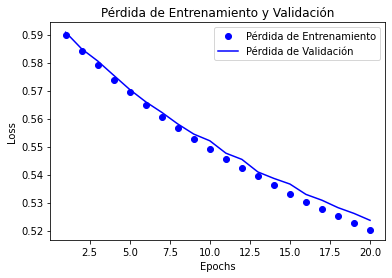

In [ ]:
history_dict = history.history
history_dict.keys()
print(history_dict['loss'])
print(history_dict['accuracy'])
print(history_dict['val_loss'])
print(history_dict['val_accuracy'])

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)


plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Se puede observar que sí mejora bastante el modelo con 20 épocas, puesto que la pérdida de los datos de validación y de los datos de entrenamiento son muy similares.

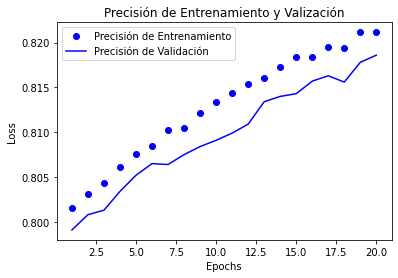

In [ ]:

plt.clf()
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Aquí vemos que también mejora bastante el modelo cuanto mayor sea el número de épocas.

### Caso 2

In [ ]:
red2.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = red2.fit(partial_x_train,
                   partial_y_train,
                   epochs  = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
98/98 [==============================] - 1s 5ms/step - loss: 0.3496 - accuracy: 0.8781 - val_loss: 0.3522 - val_accuracy: 0.8773
Epoch 2/20
98/98 [==============================] - 0s 4ms/step - loss: 0.3474 - accuracy: 0.8771 - val_loss: 0.3613 - val_accuracy: 0.8716
Epoch 3/20
98/98 [==============================] - 0s 4ms/step - loss: 0.3464 - accuracy: 0.8787 - val_loss: 0.3597 - val_accuracy: 0.8726
Epoch 4/20
98/98 [==============================] - 0s 4ms/step - loss: 0.3444 - accuracy: 0.8786 - val_loss: 0.3562 - val_accuracy: 0.8719
Epoch 5/20
98/98 [==============================] - 0s 4ms/step - loss: 0.3451 - accuracy: 0.8787 - val_loss: 0.3599 - val_accuracy: 0.8719
Epoch 6/20
98/98 [==============================] - 0s 4ms/step - loss: 0.3445 - accuracy: 0.8796 - val_loss: 0.3682 - val_accuracy: 0.8678
Epoch 7/20
98/98 [==============================] - 0s 4ms/step - loss: 0.3438 - accuracy: 0.8792 - val_loss: 0.3657 - val_accuracy: 0.8693
Epoch 8/20
98/98 [==

[0.3495928943157196, 0.34737393260002136, 0.3464140295982361, 0.3443988263607025, 0.34514105319976807, 0.3445260524749756, 0.34380480647087097, 0.3425523042678833, 0.34199661016464233, 0.3419022560119629, 0.34115928411483765, 0.3408995568752289, 0.33990421891212463, 0.33976665139198303, 0.3388233482837677, 0.33922839164733887, 0.3379078209400177, 0.3383035659790039, 0.33714020252227783, 0.3379213809967041]
[0.8780999779701233, 0.8771399855613708, 0.8786799907684326, 0.8786399960517883, 0.8787400126457214, 0.8796399831771851, 0.8791599869728088, 0.8802199959754944, 0.8791800141334534, 0.8799800276756287, 0.8801000118255615, 0.8795599937438965, 0.8812800049781799, 0.8799800276756287, 0.8802400231361389, 0.8806599974632263, 0.8814799785614014, 0.8809000253677368, 0.8815600275993347, 0.8801800012588501]
[0.3521744906902313, 0.36133790016174316, 0.35968682169914246, 0.35622477531433105, 0.3598514497280121, 0.3682050406932831, 0.36570391058921814, 0.3610808253288269, 0.3573673963546753, 0.35

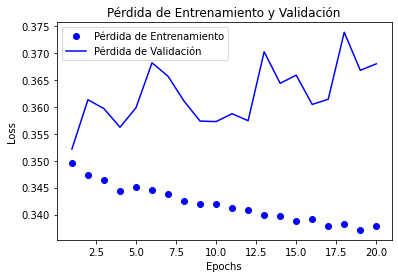

In [ ]:
history_dict = history.history
history_dict.keys()
print(history_dict['loss'])
print(history_dict['accuracy'])
print(history_dict['val_loss'])
print(history_dict['val_accuracy'])

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)


plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Se puede observar que la pérdida de validación se comporta de manera muy diferente a la pérdida de entrenmiento.

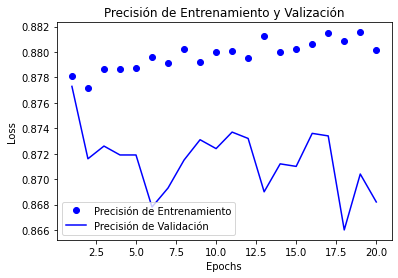

In [ ]:

plt.clf()
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Aquí vemos que también hay una gran diferencia entre ambas.  
Esto se debe a que se ha producido un sobreentrenamiento.

### Caso 3

In [ ]:
red3.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = red3.fit(partial_x_train,
                   partial_y_train,
                   epochs  = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
98/98 [==============================] - 1s 5ms/step - loss: 1.2905 - accuracy: 0.6713 - val_loss: 1.2756 - val_accuracy: 0.6716
Epoch 2/20
98/98 [==============================] - 0s 4ms/step - loss: 1.2711 - accuracy: 0.6732 - val_loss: 1.2568 - val_accuracy: 0.6725
Epoch 3/20
98/98 [==============================] - 0s 4ms/step - loss: 1.2525 - accuracy: 0.6749 - val_loss: 1.2386 - val_accuracy: 0.6757
Epoch 4/20
98/98 [==============================] - 0s 4ms/step - loss: 1.2346 - accuracy: 0.6771 - val_loss: 1.2211 - val_accuracy: 0.6776
Epoch 5/20
98/98 [==============================] - 0s 4ms/step - loss: 1.2175 - accuracy: 0.6792 - val_loss: 1.2044 - val_accuracy: 0.6791
Epoch 6/20
98/98 [==============================] - 0s 4ms/step - loss: 1.2009 - accuracy: 0.6801 - val_loss: 1.1883 - val_accuracy: 0.6811
Epoch 7/20
98/98 [==============================] - 0s 4ms/step - loss: 1.1851 - accuracy: 0.6817 - val_loss: 1.1727 - val_accuracy: 0.6835
Epoch 8/20
98/98 [==

[1.2905455827713013, 1.2711375951766968, 1.2525250911712646, 1.234649896621704, 1.2174667119979858, 1.2009334564208984, 1.1850589513778687, 1.169757604598999, 1.1550354957580566, 1.1408451795578003, 1.1271876096725464, 1.114011526107788, 1.1012991666793823, 1.0890270471572876, 1.0771745443344116, 1.0657055377960205, 1.0546107292175293, 1.04387629032135, 1.0334687232971191, 1.0233805179595947]
[0.6713399887084961, 0.6732000112533569, 0.6748999953269958, 0.6771000027656555, 0.6792200207710266, 0.6800600290298462, 0.6817200183868408, 0.6840800046920776, 0.6858599781990051, 0.6879000067710876, 0.6891800165176392, 0.6910799741744995, 0.6928200125694275, 0.6945000290870667, 0.6970199942588806, 0.6988199949264526, 0.7002800107002258, 0.7019199728965759, 0.7036200165748596, 0.7050999999046326]
[1.275619387626648, 1.2567626237869263, 1.2386029958724976, 1.221147894859314, 1.2043843269348145, 1.1882826089859009, 1.1727396249771118, 1.1578198671340942, 1.1434366703033447, 1.1296252012252808, 1.11

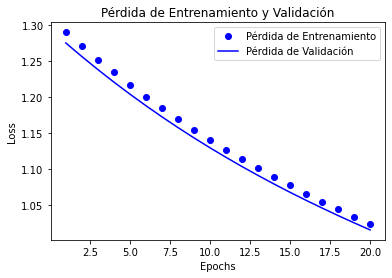

In [ ]:
history_dict = history.history
history_dict.keys()
print(history_dict['loss'])
print(history_dict['accuracy'])
print(history_dict['val_loss'])
print(history_dict['val_accuracy'])

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)


plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Se puede observar que sí mejora bastante el modelo con 20 épocas, puesto que la pérdida de los datos de validación y de los datos de entrenamiento son muy similares.

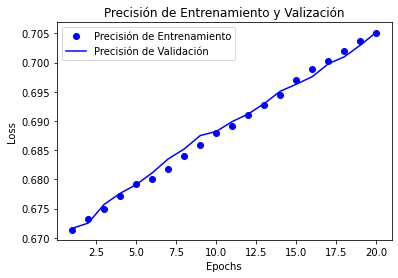

In [ ]:

plt.clf()
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Aquí vemos que también mejora bastante el modelo cuanto mayor sea el número de épocas.

### Caso 4

In [ ]:
red4.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = red4.fit(partial_x_train,
                   partial_y_train,
                   epochs  = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
98/98 [==============================] - 1s 5ms/step - loss: 0.4785 - accuracy: 0.8371 - val_loss: 0.4769 - val_accuracy: 0.8374
Epoch 2/20
98/98 [==============================] - 0s 4ms/step - loss: 0.4696 - accuracy: 0.8390 - val_loss: 0.4691 - val_accuracy: 0.8407
Epoch 3/20
98/98 [==============================] - 0s 4ms/step - loss: 0.4617 - accuracy: 0.8411 - val_loss: 0.4617 - val_accuracy: 0.8426
Epoch 4/20
98/98 [==============================] - 0s 4ms/step - loss: 0.4553 - accuracy: 0.8432 - val_loss: 0.4581 - val_accuracy: 0.8413
Epoch 5/20
98/98 [==============================] - 0s 4ms/step - loss: 0.4487 - accuracy: 0.8454 - val_loss: 0.4535 - val_accuracy: 0.8437
Epoch 6/20
98/98 [==============================] - 0s 4ms/step - loss: 0.4434 - accuracy: 0.8463 - val_loss: 0.4471 - val_accuracy: 0.8459
Epoch 7/20
98/98 [==============================] - 0s 4ms/step - loss: 0.4380 - accuracy: 0.8486 - val_loss: 0.4438 - val_accuracy: 0.8462
Epoch 8/20
98/98 [==

[0.47852057218551636, 0.46962061524391174, 0.46171101927757263, 0.4553091824054718, 0.44872406125068665, 0.4434230923652649, 0.4380163550376892, 0.4330158233642578, 0.4287228584289551, 0.42422032356262207, 0.420566201210022, 0.41685500741004944, 0.4132728576660156, 0.4102284014225006, 0.40756955742836, 0.4044015109539032, 0.4022632837295532, 0.3992442488670349, 0.3968278467655182, 0.3949849605560303]
[0.8371400237083435, 0.8389999866485596, 0.8410999774932861, 0.8432199954986572, 0.8453599810600281, 0.8462600111961365, 0.8485599756240845, 0.8501200079917908, 0.8515999913215637, 0.8523799777030945, 0.8528599739074707, 0.8544800281524658, 0.8546199798583984, 0.8557000160217285, 0.8565000295639038, 0.8583199977874756, 0.858240008354187, 0.8596199750900269, 0.8599200248718262, 0.860040009021759]
[0.47686684131622314, 0.469072550535202, 0.461686372756958, 0.4581368565559387, 0.45346903800964355, 0.44711434841156006, 0.4437701106071472, 0.44211387634277344, 0.43782779574394226, 0.43393388390

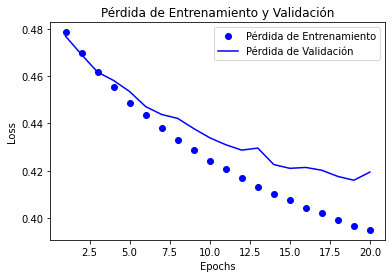

In [ ]:
history_dict = history.history
history_dict.keys()
print(history_dict['loss'])
print(history_dict['accuracy'])
print(history_dict['val_loss'])
print(history_dict['val_accuracy'])

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)


plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Se puede observar que a partir de la tercera época se aprecia más diferencia entre las pérdidas, pero aun así creemos que el modelo mejora bastante después de 18 épocas.

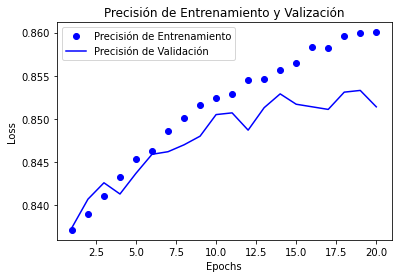

In [ ]:

plt.clf()
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Aquí vemos que se producen bastantes picos con los datos de validación. Se percibe que lo mejor sería parar en 16 épocas, ya que se trata de un máximo de la función.

### Caso 5

In [ ]:
red5.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = red5.fit(partial_x_train,
                   partial_y_train,
                   epochs  = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
98/98 [==============================] - 2s 20ms/step - loss: 0.4960 - accuracy: 0.8337 - val_loss: 0.4932 - val_accuracy: 0.8373
Epoch 2/20
98/98 [==============================] - 2s 19ms/step - loss: 0.4919 - accuracy: 0.8348 - val_loss: 0.4901 - val_accuracy: 0.8374
Epoch 3/20
98/98 [==============================] - 2s 19ms/step - loss: 0.4886 - accuracy: 0.8359 - val_loss: 0.4870 - val_accuracy: 0.8395
Epoch 4/20
98/98 [==============================] - 2s 19ms/step - loss: 0.4854 - accuracy: 0.8367 - val_loss: 0.4838 - val_accuracy: 0.8388
Epoch 5/20
98/98 [==============================] - 2s 19ms/step - loss: 0.4822 - accuracy: 0.8375 - val_loss: 0.4815 - val_accuracy: 0.8395
Epoch 6/20
98/98 [==============================] - 2s 19ms/step - loss: 0.4795 - accuracy: 0.8381 - val_loss: 0.4791 - val_accuracy: 0.8417
Epoch 7/20
98/98 [==============================] - 2s 19ms/step - loss: 0.4764 - accuracy: 0.8385 - val_loss: 0.4764 - val_accuracy: 0.8420
Epoch 8/20
98

[0.4959564805030823, 0.49194711446762085, 0.4885866343975067, 0.4854465126991272, 0.4822080433368683, 0.47946852445602417, 0.47643202543258667, 0.4737151265144348, 0.47149476408958435, 0.4688049554824829, 0.4663441479206085, 0.4638948440551758, 0.461757630109787, 0.4599049687385559, 0.45765966176986694, 0.4557483196258545, 0.4536285102367401, 0.451829731464386, 0.4501376450061798, 0.4487106204032898]
[0.8336600065231323, 0.8348399996757507, 0.8358799815177917, 0.8367199897766113, 0.8374599814414978, 0.838100016117096, 0.8385199904441833, 0.8401600122451782, 0.8399999737739563, 0.8416600227355957, 0.84170001745224, 0.8432000279426575, 0.8426399827003479, 0.843779981136322, 0.8445600271224976, 0.8453800082206726, 0.8459200263023376, 0.8460400104522705, 0.8470600247383118, 0.8474199771881104]
[0.4932153820991516, 0.49010786414146423, 0.4869677722454071, 0.4838147461414337, 0.48146873712539673, 0.4791439473628998, 0.4764336049556732, 0.47342026233673096, 0.47242534160614014, 0.469081163406

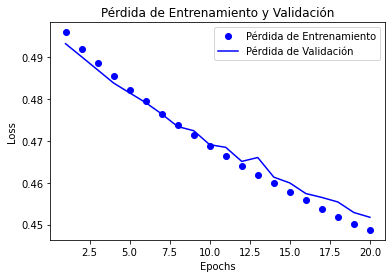

In [ ]:
history_dict = history.history
history_dict.keys()
print(history_dict['loss'])
print(history_dict['accuracy'])
print(history_dict['val_loss'])
print(history_dict['val_accuracy'])

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)


plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Se puede observar que sí mejora bastante el modelo con 20 épocas, puesto que la pérdida de los datos de validación y de los datos de entrenamiento son muy similares.

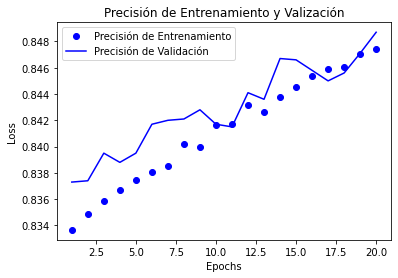

In [ ]:

plt.clf()
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Aquí vemos que, aprtir de la época 15, tiene más precisión con losd atos que no ha visto nunca que con los de entrenamiento.

### Caso 6

In [ ]:
red6.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = red6.fit(partial_x_train,
                   partial_y_train,
                   epochs  = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
98/98 [==============================] - 3s 23ms/step - loss: 0.2651 - accuracy: 0.9029 - val_loss: 0.2484 - val_accuracy: 0.9032
Epoch 2/20
98/98 [==============================] - 2s 21ms/step - loss: 0.2435 - accuracy: 0.9090 - val_loss: 0.2471 - val_accuracy: 0.9089
Epoch 3/20
98/98 [==============================] - 2s 21ms/step - loss: 0.2354 - accuracy: 0.9126 - val_loss: 0.2548 - val_accuracy: 0.9057
Epoch 4/20
98/98 [==============================] - 2s 21ms/step - loss: 0.2292 - accuracy: 0.9138 - val_loss: 0.2619 - val_accuracy: 0.9018
Epoch 5/20
98/98 [==============================] - 2s 21ms/step - loss: 0.2184 - accuracy: 0.9190 - val_loss: 0.2642 - val_accuracy: 0.8988
Epoch 6/20
98/98 [==============================] - 2s 21ms/step - loss: 0.2141 - accuracy: 0.9202 - val_loss: 0.2499 - val_accuracy: 0.9068
Epoch 7/20
98/98 [==============================] - 2s 21ms/step - loss: 0.2059 - accuracy: 0.9245 - val_loss: 0.2407 - val_accuracy: 0.9099
Epoch 8/20
98

[0.2651298940181732, 0.24351872503757477, 0.23542235791683197, 0.22921383380889893, 0.21838314831256866, 0.21408966183662415, 0.20589232444763184, 0.2015790194272995, 0.196358785033226, 0.18941819667816162, 0.18353241682052612, 0.17970527708530426, 0.17408347129821777, 0.1694091260433197, 0.1656741201877594, 0.15966449677944183, 0.15572671592235565, 0.15252672135829926, 0.14807185530662537, 0.14541339874267578]
[0.9029200077056885, 0.9089800119400024, 0.912559986114502, 0.9138200283050537, 0.9189599752426147, 0.9202200174331665, 0.9244800209999084, 0.9254000186920166, 0.9267600178718567, 0.9297000169754028, 0.932640016078949, 0.9336599707603455, 0.9358000159263611, 0.9367200136184692, 0.939520001411438, 0.9409000277519226, 0.9426400065422058, 0.9431999921798706, 0.9448999762535095, 0.9460800290107727]
[0.2484063059091568, 0.24710722267627716, 0.25482723116874695, 0.26192572712898254, 0.2642259895801544, 0.2498549073934555, 0.24074909090995789, 0.2635720670223236, 0.26513728499412537, 0

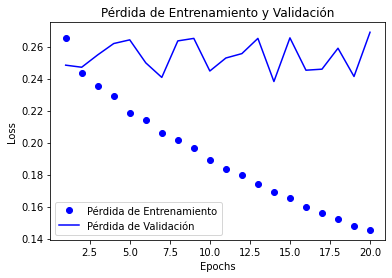

In [ ]:
history_dict = history.history
history_dict.keys()
print(history_dict['loss'])
print(history_dict['accuracy'])
print(history_dict['val_loss'])
print(history_dict['val_accuracy'])

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)


plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Se puede observar que tras 2 épocas, se produce una gran diferencia entre ambas pérdidas, siendo mayor la de los datos de validación. Se ha producido un sobreentrenamiento.

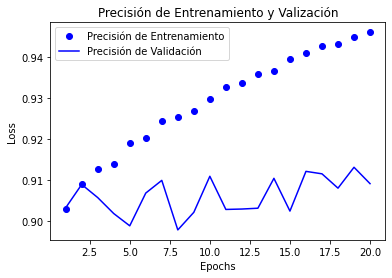

In [ ]:

plt.clf()
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Aquí vemos que también, después de 2 épocas, el modelo pierde precisión con los datos de validación.

### Caso 7

In [ ]:
red7.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = red7.fit(partial_x_train,
                   partial_y_train,
                   epochs  = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
98/98 [==============================] - 2s 21ms/step - loss: 0.4924 - accuracy: 0.8288 - val_loss: 0.4907 - val_accuracy: 0.8292
Epoch 2/20
98/98 [==============================] - 2s 19ms/step - loss: 0.4918 - accuracy: 0.8288 - val_loss: 0.4902 - val_accuracy: 0.8291
Epoch 3/20
98/98 [==============================] - 2s 19ms/step - loss: 0.4912 - accuracy: 0.8295 - val_loss: 0.4895 - val_accuracy: 0.8302
Epoch 4/20
98/98 [==============================] - 2s 19ms/step - loss: 0.4906 - accuracy: 0.8293 - val_loss: 0.4892 - val_accuracy: 0.8292
Epoch 5/20
98/98 [==============================] - 2s 19ms/step - loss: 0.4900 - accuracy: 0.8293 - val_loss: 0.4888 - val_accuracy: 0.8302
Epoch 6/20
98/98 [==============================] - 2s 19ms/step - loss: 0.4893 - accuracy: 0.8300 - val_loss: 0.4879 - val_accuracy: 0.8304
Epoch 7/20
98/98 [==============================] - 2s 19ms/step - loss: 0.4888 - accuracy: 0.8297 - val_loss: 0.4885 - val_accuracy: 0.8294
Epoch 8/20
98

[0.49241527915000916, 0.4917638301849365, 0.4911736249923706, 0.49055519700050354, 0.49000492691993713, 0.48934414982795715, 0.4888244569301605, 0.48826953768730164, 0.4876978099346161, 0.48708686232566833, 0.48649919033050537, 0.4860110282897949, 0.4854367971420288, 0.48490047454833984, 0.4844084084033966, 0.4839348793029785, 0.48334768414497375, 0.4827757775783539, 0.48229894042015076, 0.4817624092102051]
[0.8287799954414368, 0.8287799954414368, 0.829479992389679, 0.8292800188064575, 0.8292999863624573, 0.8300399780273438, 0.8296800255775452, 0.8300999999046326, 0.8301200270652771, 0.8306199908256531, 0.83024001121521, 0.8306800127029419, 0.8312600255012512, 0.8311200141906738, 0.8315600156784058, 0.8315399885177612, 0.8318799734115601, 0.8315799832344055, 0.8318799734115601, 0.8324199914932251]
[0.4906805157661438, 0.490220308303833, 0.4894937574863434, 0.4891553819179535, 0.48879674077033997, 0.48794594407081604, 0.48846644163131714, 0.4870145618915558, 0.48630550503730774, 0.48591

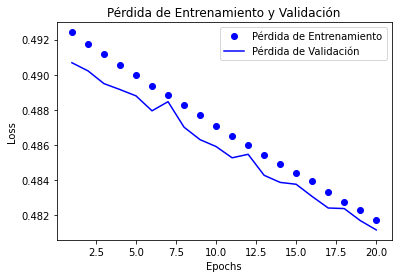

In [ ]:
history_dict = history.history
history_dict.keys()
print(history_dict['loss'])
print(history_dict['accuracy'])
print(history_dict['val_loss'])
print(history_dict['val_accuracy'])

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)


plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Se puede observar que sí mejora bastante el modelo con 20 épocas, puesto que la pérdida de los datos de validación y de los datos de entrenamiento son muy similares.

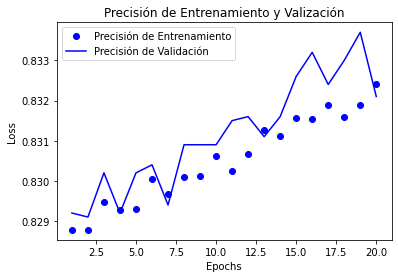

In [ ]:

plt.clf()
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Aquí vemos que también mejora la precisión del modelo frente a los datos que no ha visto nunca, cuantas más épocas de entrenmiento realice.

### Caso 8

In [ ]:
red8.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = red8.fit(partial_x_train,
                   partial_y_train,
                   epochs  = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
98/98 [==============================] - 3s 22ms/step - loss: 0.3199 - accuracy: 0.8832 - val_loss: 0.3033 - val_accuracy: 0.8888
Epoch 2/20
98/98 [==============================] - 2s 21ms/step - loss: 0.3103 - accuracy: 0.8859 - val_loss: 0.3151 - val_accuracy: 0.8870
Epoch 3/20
98/98 [==============================] - 2s 21ms/step - loss: 0.3035 - accuracy: 0.8884 - val_loss: 0.3092 - val_accuracy: 0.8879
Epoch 4/20
98/98 [==============================] - 2s 21ms/step - loss: 0.2983 - accuracy: 0.8897 - val_loss: 0.2982 - val_accuracy: 0.8897
Epoch 5/20
98/98 [==============================] - 2s 21ms/step - loss: 0.2920 - accuracy: 0.8930 - val_loss: 0.3035 - val_accuracy: 0.8882
Epoch 6/20
98/98 [==============================] - 2s 21ms/step - loss: 0.2888 - accuracy: 0.8931 - val_loss: 0.3053 - val_accuracy: 0.8861
Epoch 7/20
98/98 [==============================] - 2s 21ms/step - loss: 0.2830 - accuracy: 0.8947 - val_loss: 0.3024 - val_accuracy: 0.8895
Epoch 8/20
98

[0.3199201822280884, 0.3102707862854004, 0.3034934401512146, 0.2983381748199463, 0.2919774651527405, 0.28884196281433105, 0.2829783260822296, 0.2792873680591583, 0.2745967507362366, 0.2701773941516876, 0.2653174102306366, 0.2619847357273102, 0.25780045986175537, 0.25321948528289795, 0.24945048987865448, 0.24605779349803925, 0.24275487661361694, 0.24018222093582153, 0.23592419922351837, 0.23376648128032684]
[0.8831999897956848, 0.8859400153160095, 0.8883799910545349, 0.8896600008010864, 0.8930000066757202, 0.8931199908256531, 0.8947399854660034, 0.8956400156021118, 0.898360013961792, 0.9001399874687195, 0.9012799859046936, 0.9033600091934204, 0.9048200249671936, 0.9063199758529663, 0.906719982624054, 0.9085400104522705, 0.9099199771881104, 0.9115399718284607, 0.9126200079917908, 0.9130600094795227]
[0.3032514750957489, 0.3150891661643982, 0.3091946542263031, 0.29823070764541626, 0.3034755289554596, 0.30529144406318665, 0.30237293243408203, 0.30948156118392944, 0.30378100275993347, 0.312

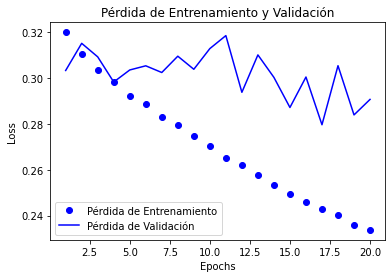

In [ ]:
history_dict = history.history
history_dict.keys()
print(history_dict['loss'])
print(history_dict['accuracy'])
print(history_dict['val_loss'])
print(history_dict['val_accuracy'])

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)


plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Se puede observar que, a partir de la segunda época, la pérdida de los datos que no ha visto nunca es mayor.

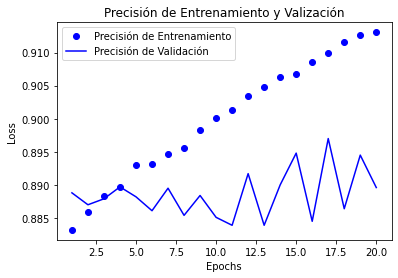

In [ ]:

plt.clf()
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Aquí vemos que también a partir de la segunda época, la precisión con los datos que no ha visto nunca disminuye. Se está produciendo un sobreentrenamiento, para evitarlo, el número de épocas debería ser dos.

Tras evaluar cada uno de los ocho modelos coparando el rendimiento del modelo en el conjunto de los datos de prueba, hemos llegado a la conclusión de que, con el optimizador _sgd_ se consigue mayor precisión y menor pérdida pero se necesitan más épocas. Mientras que con el optimizador _rmsprop_, con 5 o menos épocas, se consiguen una pérdida y precisión similares en los datos de entrenamiento y los que no ha visto nunca.

## 6. PREDICCIONES SOBRE LAS IMÁGENES DE _TEST_
Vamos a realizar predicciones para las 10 primeras imágenes con cada uno de los ocho modelos. Después comentaremos los resultados para la sexta imagen.  
Primero vemos que la sexta imagen corresponde con unos pantalones y transformamos los datos.

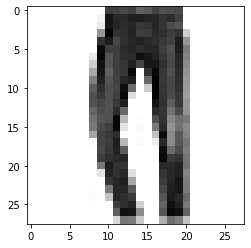

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
digit = test_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

Después creamos la función plot_image para ir mostrando por pantalla las distintas predicciones.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

### Caso 1

In [ ]:
predictions = red1.predict(test_images)
print(np.argmax(predictions[5]))
print(predictions[5])
np.sum(predictions[5])
print(predictions)

1
[1.1638266e-03 9.8991793e-01 3.0079181e-04 8.1503665e-04 6.3885017e-03
 2.2673481e-09 3.8363211e-04 8.4170779e-08 1.0299890e-03 2.7132904e-07]
[[9.7272778e-07 1.1869999e-05 1.1364172e-05 ... 2.4091336e-01
  1.6809091e-03 6.0223144e-01]
 [1.4373171e-04 5.0403960e-06 9.5145041e-01 ... 3.1530828e-12
  1.0188766e-05 5.2791815e-08]
 [3.9077686e-06 9.9983609e-01 3.2517410e-06 ... 8.3682899e-10
  2.8034019e-05 2.6443689e-09]
 ...
 [2.7057567e-01 7.6836417e-04 1.3056562e-03 ... 3.4610220e-04
  5.5936778e-01 8.4359766e-05]
 [4.6145724e-05 9.8846483e-01 1.8615999e-04 ... 5.2210848e-06
  8.9615067e-05 7.0190174e-05]
 [1.4330044e-04 4.9040467e-04 5.6163169e-04 ... 2.0655937e-01
  3.6319993e-02 1.1101050e-01]]


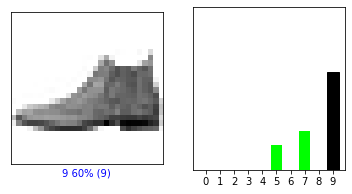

<Figure size 432x288 with 0 Axes>

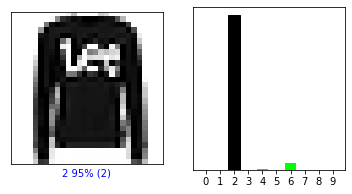

<Figure size 432x288 with 0 Axes>

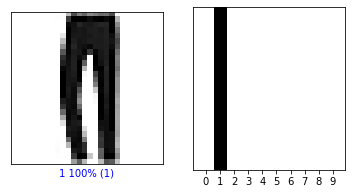

<Figure size 432x288 with 0 Axes>

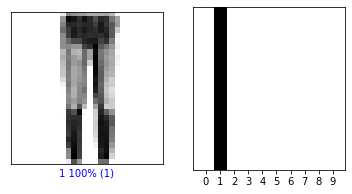

<Figure size 432x288 with 0 Axes>

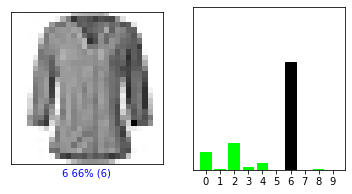

<Figure size 432x288 with 0 Axes>

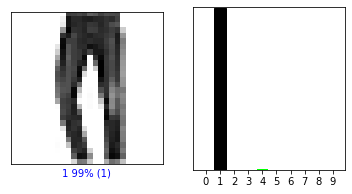

<Figure size 432x288 with 0 Axes>

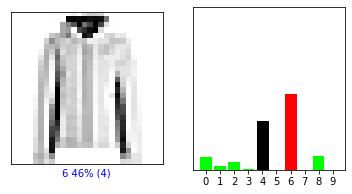

<Figure size 432x288 with 0 Axes>

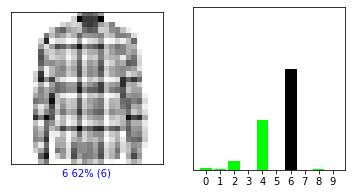

<Figure size 432x288 with 0 Axes>

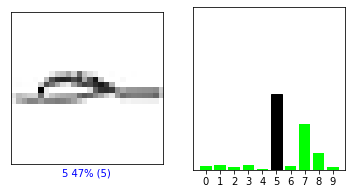

<Figure size 432x288 with 0 Axes>

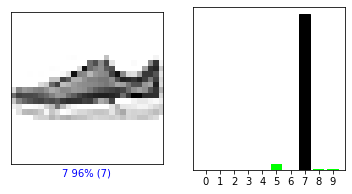

<Figure size 432x288 with 0 Axes>

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = red1.predict(test_images)
for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

Las líneas negras representan la probabilidad más alta y por tanto, la predicción. Las verdes, el porcentaje de ocasiones en que se equivoca y con que prendas se confunde. Cuando la línea es roja, es porque ha errado la predicción.  
Con esta red la predicción comete errores sobre todo en las prendas que no son pantalones, concretamente las chanclas las predice al 44%. Con respecto a la sexta imagen predice casi al 100% que es 1, es decir, pantalones.

### Caso 2

In [ ]:
predictions = red2.predict(test_images)
print(np.argmax(predictions[5]))
print(predictions[5])
np.sum(predictions[5])
print(predictions)

1
[1.3266099e-03 9.9837399e-01 3.5964669e-05 1.2264700e-04 9.9467892e-05
 1.9310945e-14 4.1285206e-05 3.6898592e-17 9.4010977e-09 4.2513287e-10]
[[1.78778168e-06 7.31252786e-13 3.31267927e-07 ... 3.39118429e-02
  4.18033311e-03 9.33823466e-01]
 [1.07724895e-03 8.18129869e-11 8.29886794e-01 ... 1.32466432e-14
  1.75431021e-04 1.17210947e-17]
 [1.67897870e-05 9.99944448e-01 2.94959955e-06 ... 3.06948465e-18
  7.05392758e-11 1.44150854e-11]
 ...
 [5.32944454e-03 2.44241249e-09 6.46930048e-03 ... 5.30118338e-10
  7.13362277e-01 2.51075438e-10]
 [1.61493074e-06 9.99189079e-01 2.61580226e-06 ... 9.60625317e-15
  3.09796500e-09 1.58792723e-09]
 [2.82216320e-06 4.72407058e-10 4.55296868e-05 ... 3.53720621e-03
  9.91244800e-04 2.43859085e-05]]


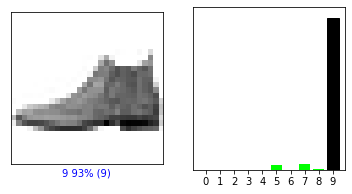

<Figure size 432x288 with 0 Axes>

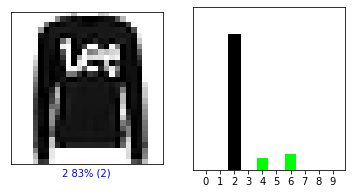

<Figure size 432x288 with 0 Axes>

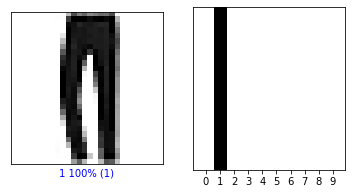

<Figure size 432x288 with 0 Axes>

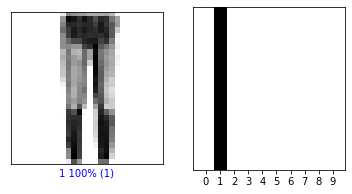

<Figure size 432x288 with 0 Axes>

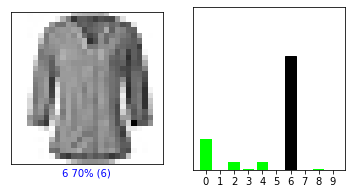

<Figure size 432x288 with 0 Axes>

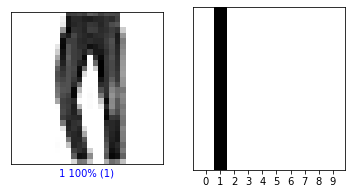

<Figure size 432x288 with 0 Axes>

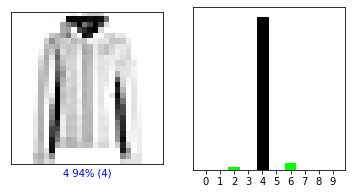

<Figure size 432x288 with 0 Axes>

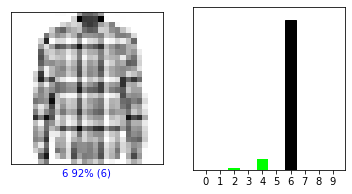

<Figure size 432x288 with 0 Axes>

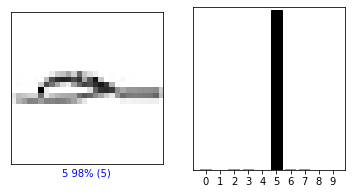

<Figure size 432x288 with 0 Axes>

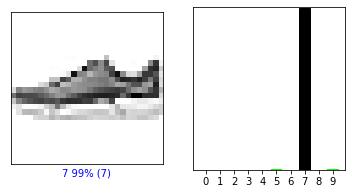

<Figure size 432x288 with 0 Axes>

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = red2.predict(test_images)
for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

Con esta red la predicción es del 100% de la sexta imagen. Además lo que mejor predice son los zapatos y los pantalones, aun así lo demás lo predice bastante bien.
### Caso 3

In [ ]:
predictions = red3.predict(test_images)
print(np.argmax(predictions[5]))
print(predictions[5])
np.sum(predictions[5])
print(predictions)

1
[0.06402154 0.60305923 0.03165031 0.15446861 0.04540035 0.01592778
 0.05825527 0.00545718 0.01938534 0.00237436]
[[0.00428497 0.00441781 0.01706088 ... 0.12794317 0.13856806 0.37070838]
 [0.05223764 0.00666898 0.41729465 ... 0.01155578 0.04707707 0.00751662]
 [0.02613945 0.7291752  0.01649459 ... 0.00325017 0.01789665 0.00175785]
 ...
 [0.11324231 0.04868798 0.04528292 ... 0.02835216 0.32256395 0.04401786]
 [0.03737801 0.6305573  0.02263639 ... 0.00468794 0.02184513 0.0021954 ]
 [0.01066949 0.00803978 0.02895051 ... 0.26750478 0.13656837 0.17084064]]


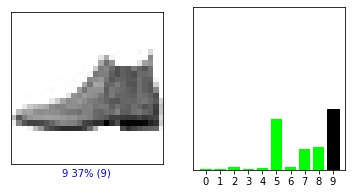

<Figure size 432x288 with 0 Axes>

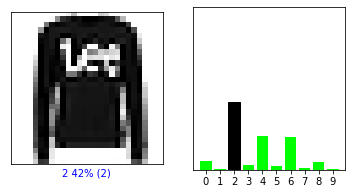

<Figure size 432x288 with 0 Axes>

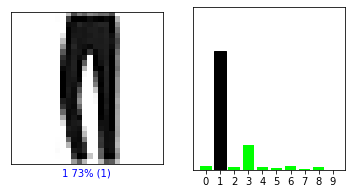

<Figure size 432x288 with 0 Axes>

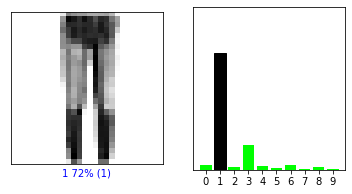

<Figure size 432x288 with 0 Axes>

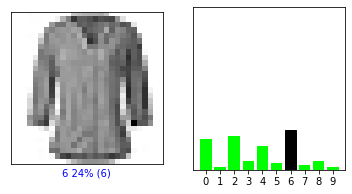

<Figure size 432x288 with 0 Axes>

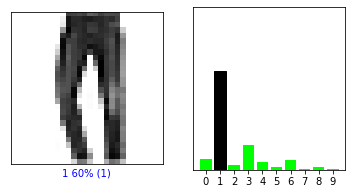

<Figure size 432x288 with 0 Axes>

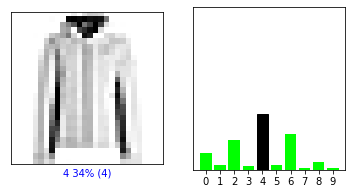

<Figure size 432x288 with 0 Axes>

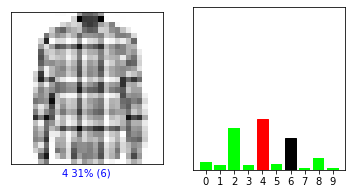

<Figure size 432x288 with 0 Axes>

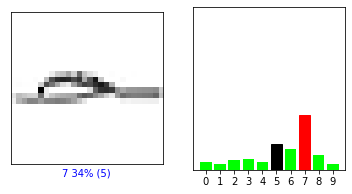

<Figure size 432x288 with 0 Axes>

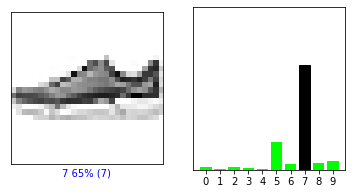

<Figure size 432x288 with 0 Axes>

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = red3.predict(test_images)
for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

Con esta red la predicción de la sexta figura sigue siendo correcta, pero tiene casos en los que da error. La predice en el 86% de los casos. Con respecto al resto de imágenes, las predice peor que en los modelos anteriores y falla en dos imágenes.
### Caso 4

In [ ]:
predictions = red4.predict(test_images)
print(np.argmax(predictions[5]))
print(predictions[5])
np.sum(predictions[5])
print(predictions)

1
[6.0878699e-03 9.8896068e-01 8.5632759e-04 1.7827599e-03 9.2211162e-04
 9.2338058e-05 1.1763287e-03 1.2423002e-06 6.5923341e-05 5.4415948e-05]
[[5.42014568e-05 1.51039349e-04 1.93296903e-04 ... 1.31556317e-01
  4.67014965e-03 7.84594417e-01]
 [2.81548081e-03 8.71309385e-05 9.23763037e-01 ... 7.74205455e-06
  2.25122800e-04 5.23721292e-06]
 [7.12751120e-04 9.97066677e-01 8.00136186e-05 ... 1.04697358e-06
  1.41150294e-05 3.45311892e-05]
 ...
 [7.94508979e-02 1.72533866e-04 4.59336489e-03 ... 4.33474919e-03
  8.33272934e-01 2.42096023e-03]
 [5.87165356e-04 9.89506423e-01 4.63203643e-04 ... 5.59201953e-06
  1.23135187e-05 2.68255098e-04]
 [2.38571025e-04 9.11425595e-05 3.21388798e-04 ... 1.23631895e-01
  6.68436848e-03 7.05298036e-03]]


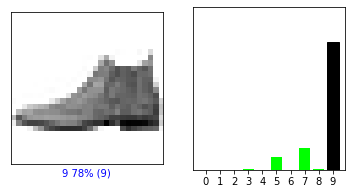

<Figure size 432x288 with 0 Axes>

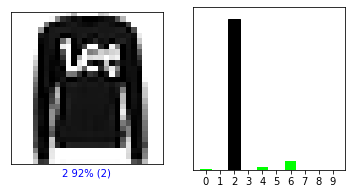

<Figure size 432x288 with 0 Axes>

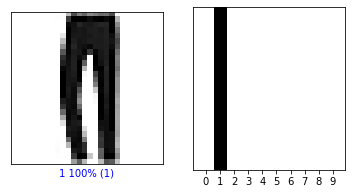

<Figure size 432x288 with 0 Axes>

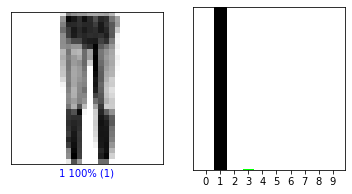

<Figure size 432x288 with 0 Axes>

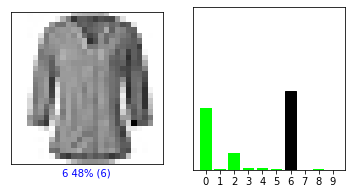

<Figure size 432x288 with 0 Axes>

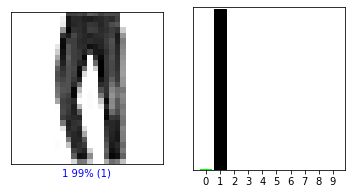

<Figure size 432x288 with 0 Axes>

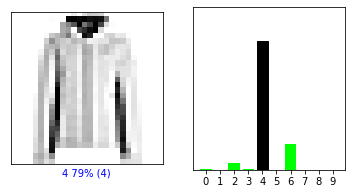

<Figure size 432x288 with 0 Axes>

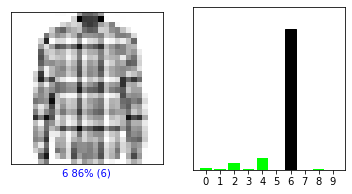

<Figure size 432x288 with 0 Axes>

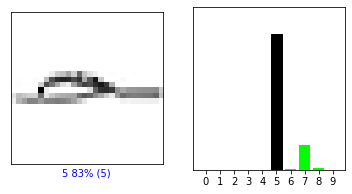

<Figure size 432x288 with 0 Axes>

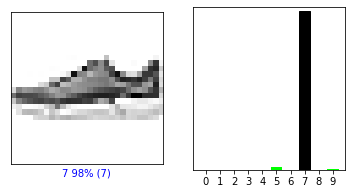

<Figure size 432x288 with 0 Axes>

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = red4.predict(test_images)
for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

Con esta red la predicción de la sexta imagen es del 97%, mejor que la anterior, pero peor que la predicción de la red 2.  
El resto de imágenes también las predice mejor que la red anterior. 

### Caso 5

In [ ]:
predictions = red5.predict(test_images)
print(np.argmax(predictions[5]))
print(predictions[5])
np.sum(predictions[5])
print(predictions)

1
[6.2475088e-03 9.8179895e-01 1.0005414e-03 1.0780540e-03 9.7314492e-03
 2.8962086e-07 1.2054723e-04 5.9230177e-07 2.1436801e-05 7.2932079e-07]
[[3.44682412e-05 3.83396546e-05 6.21915897e-05 ... 2.47727290e-01
  4.86647431e-03 5.98260701e-01]
 [6.88743719e-04 1.34087923e-05 9.24934149e-01 ... 5.64708558e-10
  1.00085454e-04 2.83076460e-08]
 [6.24358800e-05 9.99774277e-01 1.93495925e-05 ... 4.36976606e-08
  4.77011667e-07 2.18612843e-08]
 ...
 [4.88637872e-02 8.87360438e-05 2.50824261e-03 ... 8.67611496e-04
  7.98534214e-01 2.42836075e-04]
 [1.00075209e-04 9.91333067e-01 1.12217320e-04 ... 5.85562611e-06
  9.53791641e-06 1.46078755e-05]
 [6.85812091e-04 9.98808420e-04 1.79979368e-03 ... 2.47410253e-01
  3.35835628e-02 3.48329954e-02]]


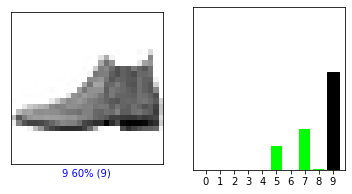

<Figure size 432x288 with 0 Axes>

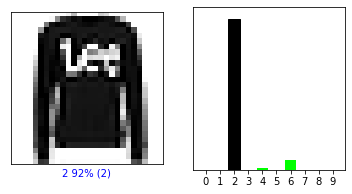

<Figure size 432x288 with 0 Axes>

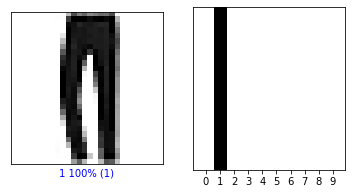

<Figure size 432x288 with 0 Axes>

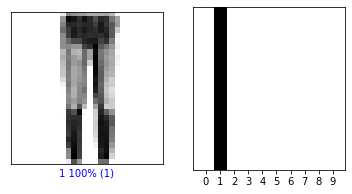

<Figure size 432x288 with 0 Axes>

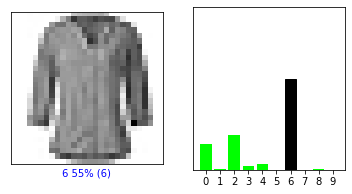

<Figure size 432x288 with 0 Axes>

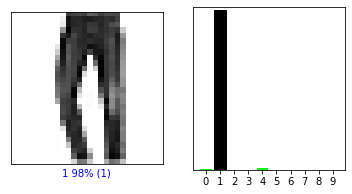

<Figure size 432x288 with 0 Axes>

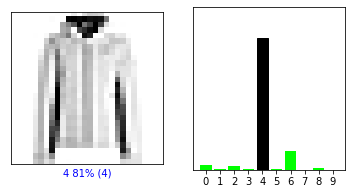

<Figure size 432x288 with 0 Axes>

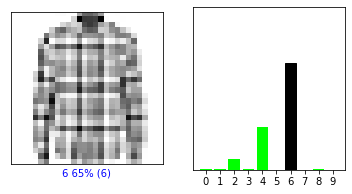

<Figure size 432x288 with 0 Axes>

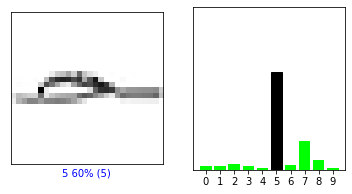

<Figure size 432x288 with 0 Axes>

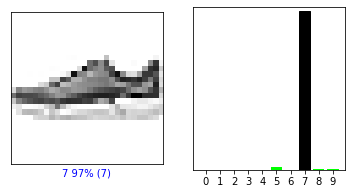

<Figure size 432x288 with 0 Axes>

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = red5.predict(test_images)
for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

Con esta red la predicción de los pantalones es muy acertada. La de la sexta imagen es bastante adecuada, aunque en el 2% de ocasiones se confunde con una camiseta o un abrigo, coincidiendo con lo que peor predice el modelo de red. 
### Caso 6

In [ ]:
predictions = red6.predict(test_images)
print(np.argmax(predictions[5]))
print(predictions[5])
np.sum(predictions[5])
print(predictions)

1
[1.2907150e-10 1.0000000e+00 8.7650149e-16 3.7710397e-11 8.0627491e-13
 1.1519998e-21 2.5334554e-12 7.6574312e-27 1.3449361e-19 5.1666544e-26]
[[1.8883629e-10 4.5172915e-13 3.6777317e-10 ... 4.3267650e-05
  4.7193905e-11 9.9994648e-01]
 [1.3089109e-04 1.6564902e-16 9.9858379e-01 ... 1.7856762e-16
  6.3698797e-13 9.8231546e-15]
 [2.1654742e-13 1.0000000e+00 2.6733566e-20 ... 1.9705850e-28
  2.2706123e-22 4.1212979e-30]
 ...
 [3.9861090e-05 1.1311163e-17 1.9011529e-06 ... 1.4803044e-10
  9.9994171e-01 4.0539645e-15]
 [3.7586732e-11 9.9999976e-01 1.7867576e-14 ... 1.2204113e-15
  1.0665988e-13 6.7169337e-16]
 [3.3489030e-08 7.9895951e-11 5.8034766e-07 ... 9.9550743e-05
  2.3271105e-05 2.1574324e-07]]


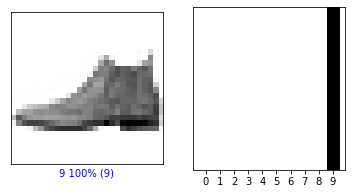

<Figure size 432x288 with 0 Axes>

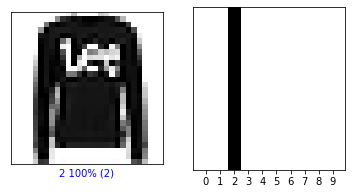

<Figure size 432x288 with 0 Axes>

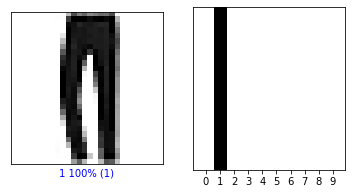

<Figure size 432x288 with 0 Axes>

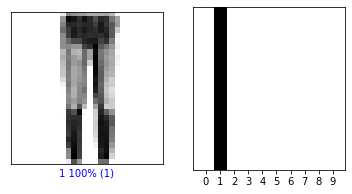

<Figure size 432x288 with 0 Axes>

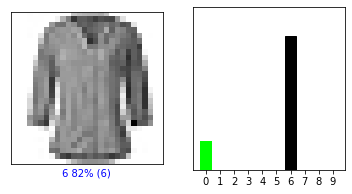

<Figure size 432x288 with 0 Axes>

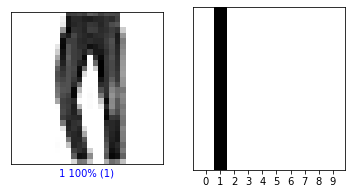

<Figure size 432x288 with 0 Axes>

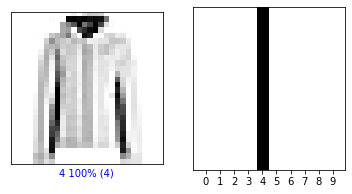

<Figure size 432x288 with 0 Axes>

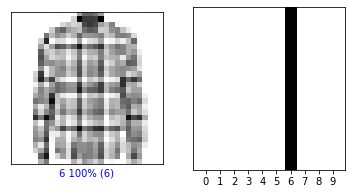

<Figure size 432x288 with 0 Axes>

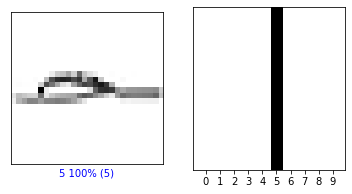

<Figure size 432x288 with 0 Axes>

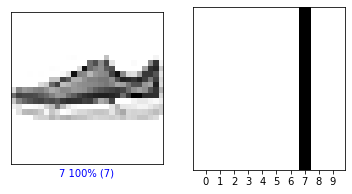

<Figure size 432x288 with 0 Axes>

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = red6.predict(test_images)
for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

Con esta red la predicción es exacta en todas las imágenes, nunca se equivoca. Excepto cuando tiene que predecir camisas, que la precisión es del 64%. 
### Caso 7

In [ ]:
predictions = red7.predict(test_images)
print(np.argmax(predictions[5]))
print(predictions[5])
np.sum(predictions[5])
print(predictions)

1
[3.5210864e-03 9.8534286e-01 8.4898487e-04 1.8152400e-03 8.0551822e-03
 4.4832683e-07 4.0376885e-04 2.9801829e-06 8.9052564e-06 5.6340139e-07]
[[2.6218053e-05 1.0013970e-05 1.1634873e-04 ... 3.3521783e-01
  1.0855110e-02 4.9431759e-01]
 [6.2436983e-04 6.7165398e-05 9.1306615e-01 ... 3.6687723e-08
  2.1666888e-04 1.3475350e-06]
 [8.1845552e-05 9.9962080e-01 3.6585341e-05 ... 5.0176578e-07
  2.8548996e-07 4.6589218e-08]
 ...
 [6.5708868e-02 4.1327567e-05 2.4455343e-03 ... 4.9731444e-04
  7.5891203e-01 2.9921235e-04]
 [3.6464052e-04 9.8731405e-01 3.7001420e-04 ... 4.3811415e-05
  5.2857213e-06 1.2470543e-05]
 [4.8001061e-04 3.5576368e-04 2.2347274e-03 ... 2.6231271e-01
  2.7149547e-02 1.7831421e-02]]


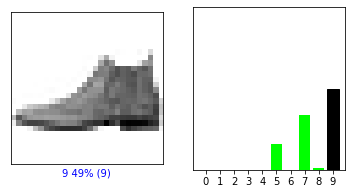

<Figure size 432x288 with 0 Axes>

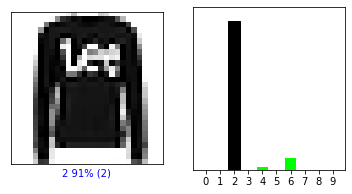

<Figure size 432x288 with 0 Axes>

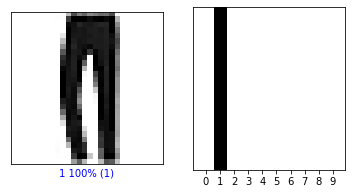

<Figure size 432x288 with 0 Axes>

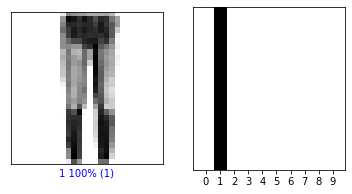

<Figure size 432x288 with 0 Axes>

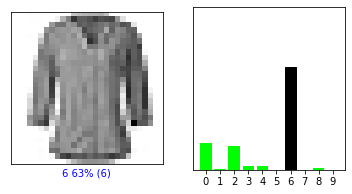

<Figure size 432x288 with 0 Axes>

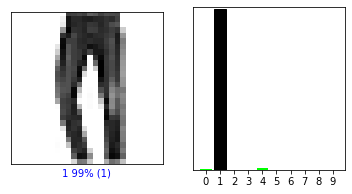

<Figure size 432x288 with 0 Axes>

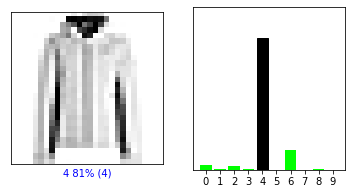

<Figure size 432x288 with 0 Axes>

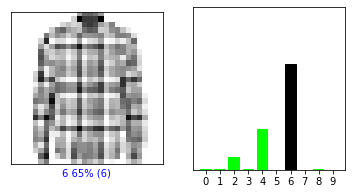

<Figure size 432x288 with 0 Axes>

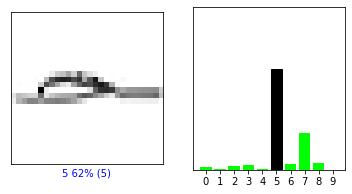

<Figure size 432x288 with 0 Axes>

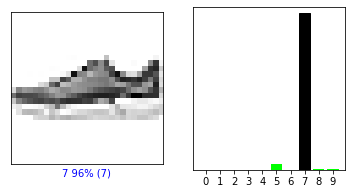

<Figure size 432x288 with 0 Axes>

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = red7.predict(test_images)
for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

Con esta red la predicción de la sexta figura es similar a la red 5, donde en un 98% acierta. Con respecto al resto de imágenes, por norma general predice muy bien los pantalones, aunque el resto también lo predice correctamente.
### Caso 8

In [ ]:
predictions = red8.predict(test_images)
print(np.argmax(predictions[5]))
print(predictions[5])
np.sum(predictions[5])
print(predictions)

1
[7.1290543e-04 9.9912077e-01 1.4521012e-05 4.8114944e-05 4.9463242e-06
 5.1476587e-11 9.8578974e-05 2.7742260e-08 1.0045056e-07 1.7059770e-10]
[[2.5243585e-07 9.2304688e-09 9.1952586e-08 ... 1.3233247e-02
  9.0724316e-06 9.8156333e-01]
 [8.3552982e-04 1.1287979e-08 9.8081607e-01 ... 4.7070270e-10
  6.2940927e-08 4.0899670e-09]
 [3.4765442e-05 9.9994946e-01 5.8827561e-07 ... 2.5831650e-08
  3.6811432e-08 4.9189586e-11]
 ...
 [2.9451640e-03 1.7575903e-08 2.2309324e-04 ... 5.3778087e-05
  9.8327488e-01 7.7730036e-09]
 [3.5207679e-06 9.9942601e-01 2.1513117e-06 ... 1.9153980e-07
  3.5133036e-07 3.1766004e-07]
 [1.6633052e-07 1.3507488e-08 6.0690418e-06 ... 1.0590650e-03
  1.3371713e-05 1.2582814e-06]]


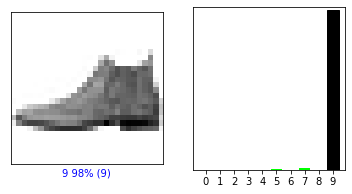

<Figure size 432x288 with 0 Axes>

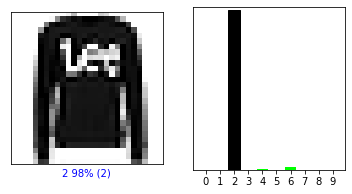

<Figure size 432x288 with 0 Axes>

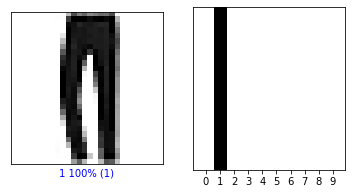

<Figure size 432x288 with 0 Axes>

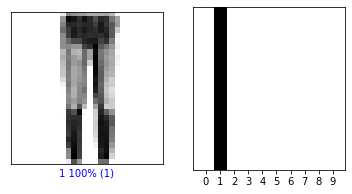

<Figure size 432x288 with 0 Axes>

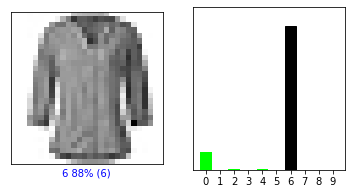

<Figure size 432x288 with 0 Axes>

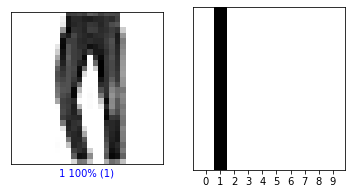

<Figure size 432x288 with 0 Axes>

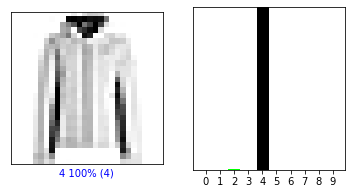

<Figure size 432x288 with 0 Axes>

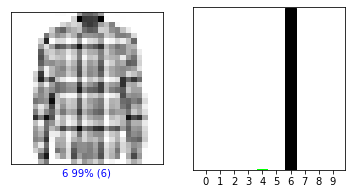

<Figure size 432x288 with 0 Axes>

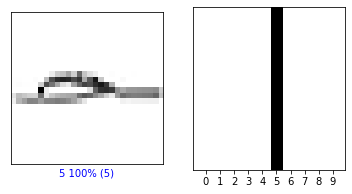

<Figure size 432x288 with 0 Axes>

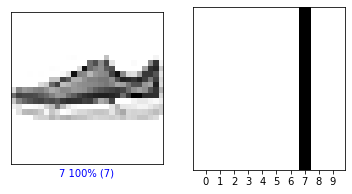

<Figure size 432x288 with 0 Axes>

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = red8.predict(test_images)
for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

Con esta red la predicción es también del 100% en la mayoría de los casos, teniendo peor precisión al predecir camisas y botas tobilleras.

Tras llevar a cabo las predicciones en las distintas redes con respecto a la sexta imagen, nos damos cuenta de que los modelos 2, 6 y 8 son los que mejor funcionan, teniendo los tres el optimizador _rmsprop_. El que peor funciona, es el caso 3, coindiciendo con lo visto al crear las redes viendo que era el modelo con mayor pérdida y menor precisión. 

Comprobamos que la red 6 es la que mejor funciona, coincidiendo también con lo visto previamente, y en todas las redes predice muy bien los pantalones.


## 7. MEJORA DEL MODELO USANDO _ADAM_ EN LA RED 3
Vamos a modificar la RNA tres utilizando el optimizador _adam_ en vez del usado previamente _sgd_.

In [ ]:
red3.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = red3.fit(partial_x_train,
                   partial_y_train,
                   epochs  = 5,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/5
98/98 [==============================] - 1s 5ms/step - loss: 0.9368 - accuracy: 0.7260 - val_loss: 0.8709 - val_accuracy: 0.7431
Epoch 2/5
98/98 [==============================] - 0s 4ms/step - loss: 0.8240 - accuracy: 0.7608 - val_loss: 0.7854 - val_accuracy: 0.7657
Epoch 3/5
98/98 [==============================] - 0s 4ms/step - loss: 0.7477 - accuracy: 0.7788 - val_loss: 0.7178 - val_accuracy: 0.7831
Epoch 4/5
98/98 [==============================] - 0s 4ms/step - loss: 0.6907 - accuracy: 0.7918 - val_loss: 0.6724 - val_accuracy: 0.7910
Epoch 5/5
98/98 [==============================] - 0s 4ms/step - loss: 0.6476 - accuracy: 0.8023 - val_loss: 0.6337 - val_accuracy: 0.8006


In [ ]:
test_loss, test_acc = red3.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.6491 - accuracy: 0.7937


Observamos que la pérdida ha disminuido a 0.45 gracias al optimizador _adam_ frente a 1.28 que tenía utilizando _sgd_. Por otro lado, la precisión ha aumentado de 0.61 a 0.84.  
_Adam_ (_Adaptative_ _Moment_ _Estimation_)se puede usar de igual manera que _sgd_, la diferencia es que _adam_ optimizador utiliza una tasa de aprendizaje para cada peso de la red y se adapta a medida que se va entrenando la red.   
_Sgd_ por su parte mantiene la misma tasa de aprendizaje para todos los pesos durante todo el entrenamiento.  
_Adam_ para calcular las tasas de aprendizaje individuales calcula la media decreciente de los gradientes pasados al cuadrado y de los gradientes pasados.  
Respecto a los optimizadores, las principales diferencias entre categorical_crossentropy y sparse_categorical_crossentropy son que categorical_crossentropy produce una matriz de un solo punto que contiene la coincidencia probable para cada categoría mientras que 
sparse_categorical_crossentropy produce un índice de categoría de la categoría de coincidencia más probable.
Muchos modelos categóricos producen una salida sparse_categorical_crossentropy porque se ahorra espacio, pero se pierde mucha información.



# 8.CONCLUSIÓN
Realizando la práctica hemos aprendido a crear una red neuronal desde cero, el funcionamiento y ventajas de unos optimizadores y funciones de pérdida frente a otros, llegando a la conclusión de que el optimizador _rmsprop_ suele funcionar mejor. También hemos aprendido como saber el número adecuado de épocas de entrenamiento a realizar, evaluando los datos de entrenamiento. Además de saber llevar a cabo predicciones con datos que la red no ha visto antes. Por último, hemos comprendido que la precisión o pérdida no van estrictamente ligados al número de neuronas en la red. Tanto los modelos con 10 neuornas como los de 512 funcionan de manera muy similar.   
Para realizar este proyecto nos hemos reunido, tanto presencial como virtualmente, y en general, hemos hecho el trabajo conjuntamente, salvo algunas investigaciones sobre optimizadores, funciones de pérdida, etc, que hemos hecho individualmente. 


# 9. BIBILIOGRAFÍA


*   From SGD to Adam - Blueqat (blueqat Inc. / former MDR Inc.). (2020, 24 mayo).Medium. Recuperado 22 de octubre de 2021, de https://medium.com/mdr-inc/from-sgd-to-adam-c9fce513c4bb

*   What is the difference between sparse_categorical_crossentropy and categorical_crossentropy? (2019, 25 octubre). Stack Overflow. Recuperado 22 de octubre de 2021, de https://stackoverflow.com/questions/58565394/what-is-the-difference-between-sparse-categorical-crossentropy-and-categorical-c

*   Team, K. (s. f.). Keras documentation: Flatten layer. Keras.Io. Recuperado 17 de octubre de 2021, de https://keras.io/api/layers/reshaping_layers/flatten/




